# 4.신경망 학습
## 4.1 데이터 주도 학습
- 학습이란 학습 데이터로부터 가중치 매개변수의 최적값을 자동으로 찾는 것을 말한다.
- 신경망이 학습할 수 있도록 하는 **지표에 해당하는 손실함수**에 대하여 알아본다.

- 딥러닝을 종단간 기계학습이라고도 칭한다.
- 데이터(입력)에서 목표한 결과(출력)을 사람의 개입 없이 얻는다는 뜻을 담고있다.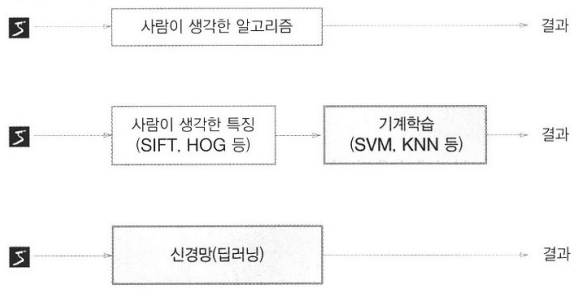

- 머신러닝과 딥러닝 모두에서 데이터를 train data와 test data로 나누어서 학습과 테스트를 진행한다.
- 보통 전체 data 에서 6:4, 7:3으로 나눈다.

- train data만 사용하여 학습하면서 최적의 가중치와 편향을 찾아낸다. 이후 test data를 이용하여 모델의 성능을 평가하게 된다.
- 위 과정은 범용성 (generalization)을 위함이다.
- 데이터를 나누지 않고 전체 데이터를 가지고 학습을 하게 된다면 모델은 학습한 데이터 셋에만 지나치게 최적화되어 새로운 데이터에 대한 성능이 떨어진다. (overfitting)

## 4.2 손실함수
- 신경망 학습에서는 현재의 상태를 하나의 지표로 표현하는데, 이 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이 **신경망학습**이다.
- 지표로 손실함수(loss function)을 사용하고 일반적으로 MSE(평균 제곱 오차)와 CEE(교차 엔트로피 오차)를 많이 사용한다.

- 가장 많이 쓰이는 손실함수는 MSE(평균 제곱 오차)
 - $y_k$ = 신경망의 출력(신경망이 추정한 값)
 - $t_k$ = 정답 레이블
 - k 는 데이터의 차원 수

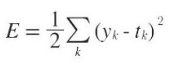

In [1]:
import numpy as np

In [2]:
#MSE 함수 구현
def mean_squared_error(y,t):
  return 0.5*np.sum((y-t)**2)

In [3]:
#정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0] #원-핫인코딩

#ex1) '2'일 확률이 가장 높다고 추정함0.6 > softmax결과값 (신경망 추정값)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
#ex2) '7'일 확률이 가장 높다고 추정함0.6 > softmax결과값 (신경망 추정값)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

- MSE를 기준으로 첫번째 추정 결과가 오차가 더 작기 때문에 정답에 더 가깝다고 판단할수 있다.

- 손실함수로써 CEE(교차 엔트로피 오차)도 자주 사용한다.
 - log 밑이 e 인 자연로그 ($log_e$)
 - $y_k$ = 신경망 모델의 출력
 - $t_k$ = 정답 레이블<br>
 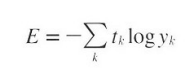
- $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다.(원핫인코딩) 따라서 실제로 정답일 때의 추정 $t_k$=1일때의 $y_k$만 계산하면 된다.<br>


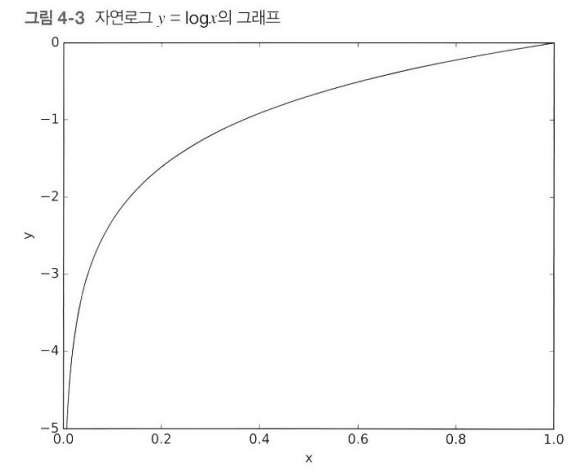

In [5]:
def cross_entropy_error(y, t):
  delta = 1e-7 #log0 방지, 아주 작은 값 더해줌
  return -np.sum(t*np.log(y + delta))

In [6]:
#정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0] #원-핫인코딩

#ex1) '2'일 확률이 가장 높다고 추정함0.6 > softmax결과값 (신경망 추정값)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
#ex2) '7'일 확률이 가장 높다고 추정함0.6 > softmax결과값 (신경망 추정값)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

- CEE가 약 0.51로 오차가 더 작은 첫번째 추정이 정답일 가능성이 더 높다고 판단했다.
- MSE에서의 판단과 동일하다.

- 딥러닝은 모든 훈련 데이터를 대상으로 손실함수 값을 구해야 하고, 그 값을 최소로 하는 매개변수를 (가중치, 편향)을 찾아내는 것이다.
- 보통의 경우 딥러닝은 Mini-batch 학습을 하기 때문에 Mini-batch 크기만큼 데이터에 대한 각각의 손실함수를 구하여 평균을 내는 **평균손실함수를** 계산한다.
 - N = Mini-batch 크기
 - $t_{nk}$ = n번째 데이터의 k차원 째 값을 의미 (정답)
 - $y_{nk}$ = n번째 데이터의 k차원 째 값을 의미 (추정값)

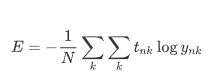

- 딥러닝에서는 훈련 데이터로부터 Mini-batch만큼 일부만 추출하여 학습을 하고, Mini-batch의 평균손실함수를 전체 훈련 데이터의 근사치로 사용하게 된다. (미니배치학습)
- 미니배치만큼 무작위로 data를 가져오는 것을 구현해본다.

In [8]:
import sys, os
sys.path.append(os.pardir)
from content.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #훈련 데이터에서 무작위로 10장만 빼낸다, 이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('batch_mask :', batch_mask)
print('x_batch.shape :', x_batch.shape)
print('t_batch.shape :', t_batch.shape)

batch_mask : [48973 27979 26074 11042 11154 14072  7607 11989 58515 13429]
x_batch.shape : (10, 784)
t_batch.shape : (10, 10)


- 미니배치와 같은 배치 데이터를 지원하는 배치용 CEE를 구현해본다.
- 데이터를 하나씩 처리하는 구현을 조금만 바꾸어 구현

In [10]:
#mini-batch CEE(one-hot)
def corss_entropy_error(y,t):
  if y.ndim ==1: #y가 1차원인경우, 데이터의 하나당 교차 엔트로피 오차를 구하는 경우
    t = t.reshape(1, t.size) #reshape로 데이터의 형상을 바꾸어준다
    y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size #배치의 크기로 나누어서 정규화하고 1장당 평균의 교차 엔트로피 오차를 계산

정답 레이블이 원핫인코딩이 아니라 숫자 레이블로 주어졌을때의 CEE는 다음과 같이 구할 수 있다.

In [11]:
def cross_entropy_error(y, t):
   if y.ndim == 1:
       t = t.reshape(1, t.size)
       y = y.reshape(1, y.size)

   batch_size = y.shape[0]
   return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

np.arange(batch_size) > 0부터 batch_size-1까지 배열을 생성<br>
각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.

- 만약 신경망 학습의 지표를 손실함수가 아니라 정확도로 설정할 경우 연속적인 값이 아니라 불연속적인 값으로 변하기 때문에 미분이 불가능하다.
- 활성화 함수에 계단함수를 사용하지 않은 이유 또한 값이 불연속적으로 변하기 때문이다.

**신경망을 학습할 때 정확도로 지표를 사용하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문에 정확도를 지표로 삼아선 안된다.**

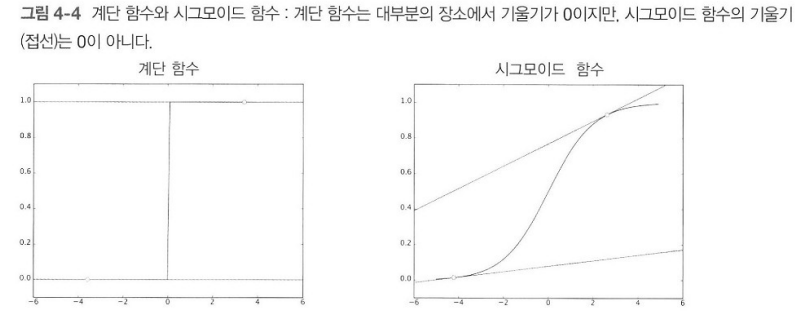

- 정확도를 지표로 삼았다면 가중치 매개변수를 조정해도 33%, 34%와 같이 불연속적인 값으로 바뀌게 된다.(미소한 변화에는 거의 반응을 보이지 않음, 매개변수의 작은 변화가 주는 파장을 계단함수가 말살하여 손실함수의 값에는 아무런 변화가 나타나지 않게 된다.)
- 손실함수를 지표로 삼는다면 매개변수의 값이 조금 변화하게 되면 그에 반응하여 손실함수의 값도 연속적으로 변화한다.

## 4.3 수치미분
- 미분은 어느 한순간의 변화 정도를 나타낸 것.<br>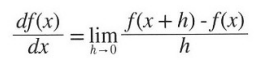

- 단순하게 구현하면 다음과 같다

In [13]:
def numerical_diff(f, x):
   h = 10e-50  # 0.000..1에서 , 0이 50개
   return (f(x+h) - f(x)) / (h)

- 반올림 오차 문제를 일으켜 소수점 8자리 이하가 생략되어 최종 계산 결과에 오차가 생기게 된다.

In [14]:
np.float32(1e-50)

0.0

- 미세한 값으로 $10^{-4}$를 사용하도록 수정
- 진정한 접선과 위에서 구현한 값은 일치하지 않는다.
- 이 오차를 줄이기 위하여 (x+h)와 (x-h)일때의 함수f의 차분을 계산하는 방법을 쓴다. x를 중심으로 차분을 계산한다는 의미로 **중심차분** 이라고 한다.

개선한 수치미분 코드<br>
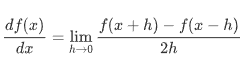

In [21]:
def numerical_diff(f, x):
   h = 1e-4  # 0.0001
   return (f(x+h) - f(x-h)) / (2*h)

- 아래 함수를 미분해보자<br>
- y = 0.01$x^2$ + 0.1x


In [22]:
def function_1(x):
   return 0.01*x**2 + 0.1*x

def tangent_line(f, x): #수치 미분값을 기울기로 하는 직선을 그리기 위함
   d = numerical_diff(f, x)
   print(d)
   y = f(x) - d*x
   return lambda t: d*t + y

0.2999999999986347


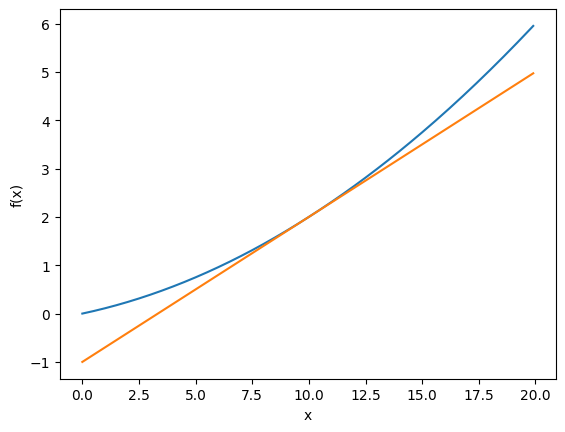

In [23]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.xlabel('x'); plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

- 편미분(partial derivative)은 다변수 함수의 특정 변수를 제외한 나머지 변수를 상수로 생각하여 미분하는 것을 말한다.<br>


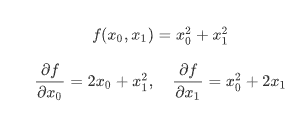

구현하면 아래와 같다.

In [36]:
def function_2(x):
  #return x[0]**2 + x[1]**2
  if x.ndim ==1:
    return np.sum(x**2)
  else:
    return np.sum(x**2, axis=1)

$x_0=3, x_1=4$ 일때 $x_0$에 대한 편미분을 구하는 문제는 다음과 같다.

In [24]:
def function_temp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_temp1, 3.0)

6.00000000000378

$x_0=3, x_1=4$ 일때 $x_1$에 대한 편미분을 구하는 문제는 다음과 같다.

In [26]:
def function_temp2(x1):
  return 3.0*2.0 + x1*x1

numerical_diff(function_temp2, 4.0)

7.999999999999119

- 위에서 편미분을 계산할 때 $x_0과 x_2$를 따로 계산했다. 양쪽의 편미분을 묶어서 계산, 모든 변수에 대한 편미분을 벡터로 나타낸 것을 기울기(gradient)라 한다.

In [32]:
def numerical_gradient_no_batch(f, x):
   h = 1e-4 # 0.0001
   grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

   for idx in range(x.size):
       tmp_val = x[idx]

       # f(x+h) 계산
       x[idx] = float(tmp_val) + h
       fxh1 = f(x)

       # f(x-h) 계산
       x[idx] = tmp_val - h
       fxh2 = f(x)

       grad[idx] = (fxh1 - fxh2) / (2*h)
       x[idx] = tmp_val # 값 복원

   return grad

# 세 점 (3,4) (0,2) (3,0)에서의 기울기
numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [33]:
numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [34]:
numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([6., 0.])

- 각 점에서 기울기를 구해보았다.
- 이 기울기가 의미하는 바에 대하여 알아보도록 결과에 마이너스를 붙인 벡터를 그려본다.

In [35]:
#배치데이터를 지원하도록 구현
def numerical_gradient(f, X):
   if X.ndim == 1:
       return numerical_gradient_no_batch(f, X)
   else:
       grad = np.zeros_like(X)

       for idx, x in enumerate(X):
           grad[idx] = numerical_gradient_no_batch(f, x)

       return grad

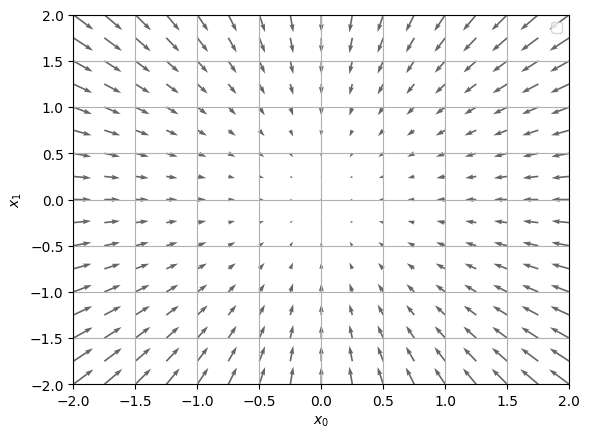

In [37]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.grid()
plt.legend()
plt.draw()
plt.show()

- 기울기는 각 지점에서 낮아지는 방향을 가르킨다. **즉 기울기가 가리키는 쪽이 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.**

- 손실함수가 최소가 되게 하는 매개변수를 찾기 위하여 경사 하강법(Gradient descent)를 사용한다.
- 기울기를 잘 이용하여 함수의 최솟값(가능한 한 작은 값)을 찾으려는 것이 경사법이다.
- 수식으로 나타내면 아래와 같다.<br>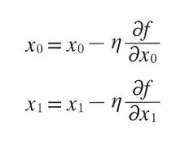


- η (eta.)는 갱신하는 양을 나타낸다. 신경망학습에서는 learning rate(학습률)이라고 한다.
 - learning rate : 한번의 학습으로 얼마만큼 학습해야 할지, 매개변수 값을 얼마나 갱신하냐를 정하는 것. 하이퍼 파라미터이며 사람이 직접 설정해야하는 매개변수이다.

In [38]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
   x = init_x
   x_history = []

   for i in range(step_num):
       x_history.append( x.copy() )

       grad = numerical_gradient(f, x)
       x -= lr * grad

   return x, np.array(x_history)

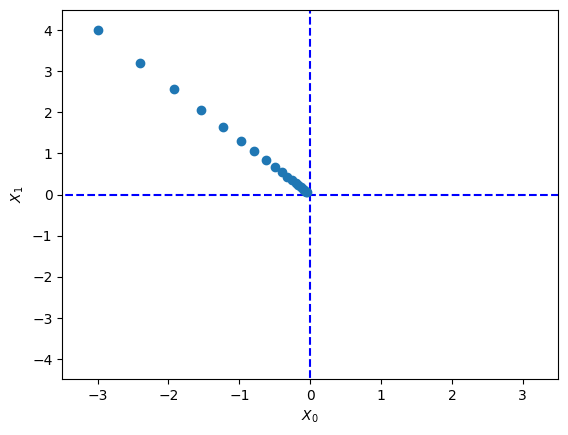

In [39]:
init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.show()

- 경사법을 사용한 갱신과정을 그림으로 나타냈다.
- 값이 가장 낮은 장소인 원점에 점차 가까워지고있다.

In [41]:
#학습률이 너무 크다면
init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [43]:
#학습률이 너무 작다면
init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

학습률이 너무 크면 큰값으로 발산, 너무 작으면 거의 갱신되지 않고 끝난다. 적절한 learning rate가 필요하다.

- 신경망 학습에서도 기울기를 구해야한다. 여기서의 기울기는 가중치 매개변수에 대한 손실함수의 기울기를 말한다.<br>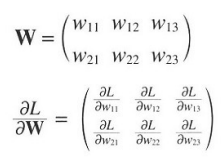

- 가중치가 W, 손실함수가 L
- 각 원소들은 w값을 조금 변경했을때 손실함수 L이 얼마나 변화하는지 나타낸다.
- 간단한 신경망에서 실제로 기울기를 구하는 코드를 구현해본다.

In [48]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from content.functions import softmax, cross_entropy_error
from content.gradient import numerical_gradient

class simpleNet:
   def __init__(self):
       self.W = np.random.randn(2, 3)  # 정규분포로 초기화

   def predict(self, x):
       return np.dot(x, self.W)

   def loss(self, x, t):
       z = self.predict(x)
       y = softmax(z)
       loss = cross_entropy_error(y, t)
       return loss

In [49]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(net.W)
print(dW)

[[ 0.67249273  1.21222588  0.50625502]
 [-0.83013302  0.98596273 -2.31598418]]
[[ 0.07207103  0.51080008 -0.58287111]
 [ 0.10810655  0.76620012 -0.87430667]]


## 4.5 학습 알고리즘 구현하기
- 전제 : 신경망에는 적응 가능한 가중치와 편향이 있다. 이 가중치와 편향을 훈련데이터 적응하도록 조정하는 과정을 '학습'이라고 한다.
- 1. 미니배치
 - 훈련 데이터 중 일부를 무작위로 가져온다. 선별한 데이터를 미니배치라고 한다. 이 미니배치의 손실 함수값을 줄이는 것이 목표.
- 2. 기울기 산출
 - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
- 3. 매개변수 갱신
 - 학습률(learning rate) 만큼 매개변수를 갱신 (gradient descent)
- 4. 1-3단계 반복

- 위는 경사하강법으로 매개변수를 갱신하는 방법을 이용한 신경망 학습이 이루어지는 순서이다.
- 데이터를 Mini-batch로 무작위 선정하기 때문에 SGD(확률적 경사 하강법)라고 부른다.


- 2층 신경망을 하나의 클래스로 구현한다.

In [50]:
import sys, os
sys.path.append(os.pardir)
from content.functions import *
from content.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화, 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수/ ex)손글씨 데이터 intput : 28X28=784, output = 10 hidden = 적당한값
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x): #신경망의 추론 처리 순전파
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t): #손실함수의 값을 계산, CEE
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):  #신경망의 추론 처리 순전파
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t): #각 매개변수의 기울기 계산(손실함수에대한)
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t): #오차역전파법 사용한 기울기 계산 (다음장내용)
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

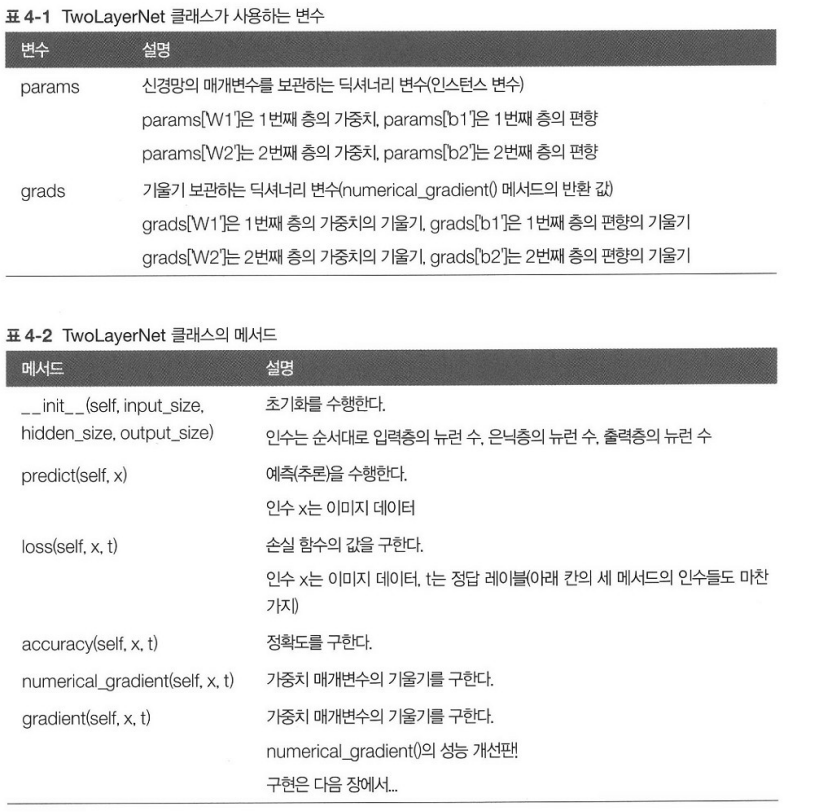

In [51]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [52]:
x = np.random.rand(1, 784)  # 더미 입력 데이터(1장 분량)
t = np.random.rand(1, 10)  # 더미 정답 레이블(1장 분량)

grads = net.numerical_gradient(x, t)  # 기울기 계산
grads['W1'].shape

(784, 100)

- 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대하여 경사법으로 매개변수를 갱신한다.
- 1 에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수를 말한다.
 - 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 '소진'한 것이 된다.<br>10,000/100 = 100회 - 1에폭

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from content.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

# 저장할 리스트 정의
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복 수
iter_per_epoch = int(train_size / batch_size)

In [54]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for step in range(iters_num):
   # Mini-Batch
   batch_mask = np.random.choice(train_size, batch_size)
   x_batch = x_train[batch_mask]
   t_batch = t_train[batch_mask]

   # 기울기 계산
   grad = network.gradient(x_batch, t_batch)

   # 매개변수 갱신
   for key in ('W1', 'b1', 'W2', 'b2'):
       network.params[key] -= learning_rate * grad[key]

   # 학습 과정 기록
   loss = network.loss(x_batch, t_batch)
   train_loss_list.append(loss)

   # 1 epoch 당 정확도 계산
   if (step+1) % iter_per_epoch == 0:
       train_acc = network.accuracy(x_train, t_train)
       test_acc = network.accuracy(x_test, t_test)
       train_acc_list.append(train_acc)
       test_acc_list.append(test_acc)
       print("Step: {:04d}, Train Acc: {:.5f}, Test Acc: {:.5f}".format(step+1, train_acc, test_acc))

Step: 0600, Train Acc: 0.78038, Test Acc: 0.78550
Step: 1200, Train Acc: 0.87337, Test Acc: 0.87970
Step: 1800, Train Acc: 0.89772, Test Acc: 0.90280
Step: 2400, Train Acc: 0.90737, Test Acc: 0.91090
Step: 3000, Train Acc: 0.91368, Test Acc: 0.91600
Step: 3600, Train Acc: 0.91915, Test Acc: 0.92160
Step: 4200, Train Acc: 0.92370, Test Acc: 0.92510
Step: 4800, Train Acc: 0.92760, Test Acc: 0.92970
Step: 5400, Train Acc: 0.93183, Test Acc: 0.93310
Step: 6000, Train Acc: 0.93418, Test Acc: 0.93390
Step: 6600, Train Acc: 0.93707, Test Acc: 0.93760
Step: 7200, Train Acc: 0.93877, Test Acc: 0.94080
Step: 7800, Train Acc: 0.94145, Test Acc: 0.94180
Step: 8400, Train Acc: 0.94328, Test Acc: 0.94290
Step: 9000, Train Acc: 0.94500, Test Acc: 0.94370
Step: 9600, Train Acc: 0.94650, Test Acc: 0.94490


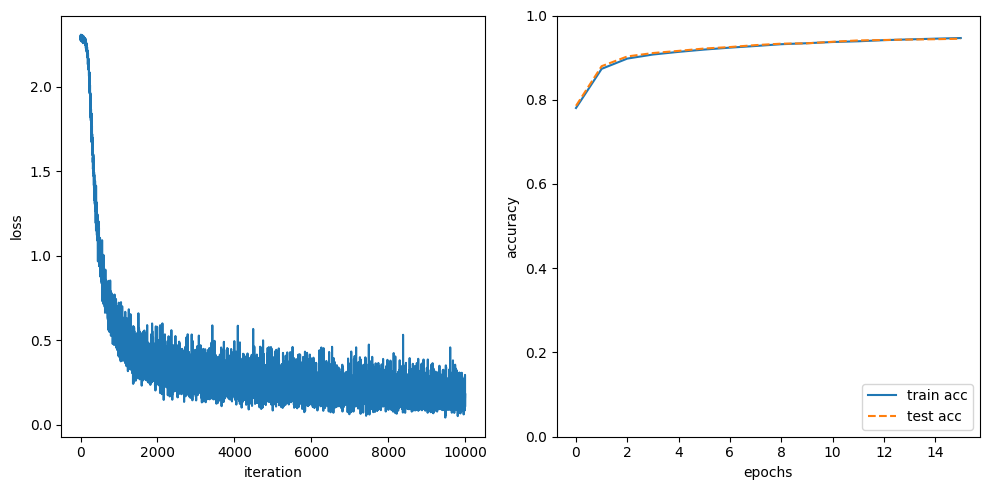

In [55]:
# 그래프 그리기
figsize(10, 5)
markers = {'train': 'o', 'test': 's'}
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x_loss = np.arange(len(train_loss_list))
ax1.plot(x_loss, train_loss_list)
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss") # 손실 함수 값의 추이, 매개변수가 서서히 데이터에 적응하고 있음을 의미한다.

x_acc = np.arange(len(train_acc_list))
ax2.plot(x_acc, train_acc_list, label='train acc')
ax2.plot(x_acc, test_acc_list, label='test acc', linestyle='--')
ax2.set_xlabel("epochs")
ax2.set_ylabel("accuracy") #훈련데이터와 시험데이터에 대한 정확도 추이, overfitting이 일어나지 않았다.
ax2.set_ylim(0, 1.0)
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

- 오버피팅이 일어났다면<br>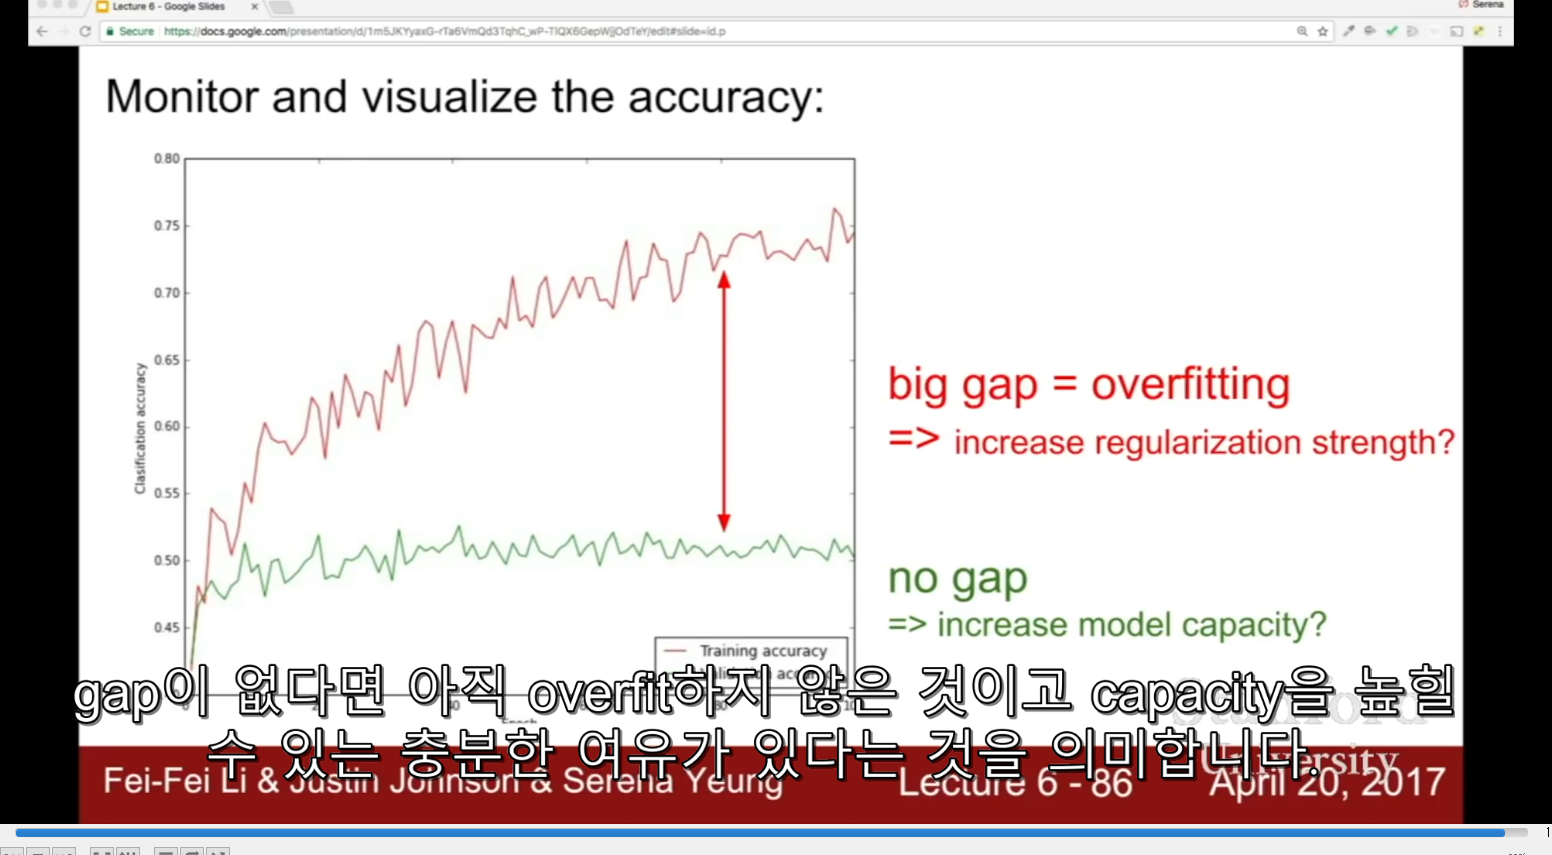

## 4.6 정리
- 기계학습에서 사용하는 데이터셋은 훈련데이터와 시험데이터로 나누어서 사용.
- 훈련 데이터에서 학습한 모델의 범용 능력을 시험 데이터로 평가.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신, 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복해준다.
- 아주 작은 값을 주었을 때의 차분으로 미분을 구하는 것을 수치미분이라고 한다.
- 수치 미분을 이용하여 가중치 매개변수의 기울기를 구할 수 있다.